# CMPS 240 Final Project

### Tina Nosrati

### 11/28/2024


In [75]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,f_oneway,chi2_contingency
import statsmodels.stats.weightstats as smw
import scipy.stats as stats
from scipy.stats import kstest, expon


In [19]:
# reading data
df=pd.read_csv("athens_weekends.csv")
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407278,0.304570,240.306496,9.054205,407.167958,6.080622,23.73168,37.97776
1,1,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367463,0.297474,39.802996,1.499687,58.706522,0.876720,23.72712,38.01435
2,2,76.629250,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194174,0.385247,78.734001,2.966519,113.326684,1.692414,23.73391,37.99529
3,3,151.852459,Entire home/apt,False,False,4.0,True,0,1,10.0,100.0,2,2.508982,0.563473,68.774881,2.591282,101.162069,1.510748,23.73200,37.99800
4,4,98.657231,Entire home/apt,False,False,2.0,True,1,0,10.0,95.0,1,2.740581,0.725045,62.902859,2.370037,92.611125,1.383049,23.73100,38.00000


# Data Prepration

In [20]:
df=df.drop(columns=['Unnamed: 0','room_shared'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     2627 non-null   float64
 1   room_type                   2627 non-null   object 
 2   room_private                2627 non-null   bool   
 3   person_capacity             2627 non-null   float64
 4   host_is_superhost           2627 non-null   bool   
 5   multi                       2627 non-null   int64  
 6   biz                         2627 non-null   int64  
 7   cleanliness_rating          2627 non-null   float64
 8   guest_satisfaction_overall  2627 non-null   float64
 9   bedrooms                    2627 non-null   int64  
 10  dist                        2627 non-null   float64
 11  metro_dist                  2627 non-null   float64
 12  attr_index                  2627 non-null   float64
 13  attr_index_norm             2627 

In [22]:
# drop duplicated values
df.drop_duplicates(inplace=True)

# make sure it's in Athens
df = df[
    (df['lat'].between(37.8, 38.1)) & 
    (df['lng'].between(23.6, 23.9))]

In [23]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.00000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,147.580456,3.690141,0.261134,0.381804,9.63190,94.905976,1.264180,1.821674,0.480538,149.327790,5.626333,216.357981,3.231077,23.731827,37.981153
std,79.814934,1.283763,0.439337,0.485921,0.84905,8.426506,0.646232,0.956845,0.286426,119.850166,4.515683,194.750570,2.908393,0.013461,0.013813
min,42.884259,2.000000,0.000000,0.000000,2.00000,20.000000,0.000000,0.113560,0.020224,27.608555,1.040228,39.691933,0.592757,23.702710,37.953000
25%,98.657231,3.000000,0.000000,0.000000,9.00000,93.000000,1.000000,1.136893,0.286208,80.693315,3.040342,114.919822,1.716206,23.723135,37.969420
50%,127.715417,4.000000,0.000000,0.000000,10.00000,97.000000,1.000000,1.668721,0.419438,118.094716,4.449542,172.572963,2.577194,23.729800,37.979480
75%,171.537037,4.000000,1.000000,1.000000,10.00000,100.000000,2.000000,2.314173,0.599855,171.177527,6.449582,245.686903,3.669073,23.739510,37.989960
max,1043.282638,6.000000,1.000000,1.000000,10.00000,100.000000,4.000000,6.222396,1.959657,2654.087111,100.000000,6696.156772,100.000000,23.786020,38.031140


In [24]:
# Convert boolean to integer
bool_columns = ['room_private', 'host_is_superhost']
df[bool_columns] = df[bool_columns].astype(int)


In [25]:
df.head()

,realSum,room_type,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,138.963748,Entire home/apt,0,4.0,1,1,0,10.0,96.0,1,0.407278,0.304570,240.306496,9.054205,407.167958,6.080622,23.73168,37.97776
1,91.627024,Entire home/apt,0,4.0,1,1,0,10.0,99.0,1,4.367463,0.297474,39.802996,1.499687,58.706522,0.876720,23.72712,38.01435
2,76.629250,Private room,1,2.0,0,0,0,10.0,100.0,1,2.194174,0.385247,78.734001,2.966519,113.326684,1.692414,23.73391,37.99529
3,151.852459,Entire home/apt,0,4.0,1,0,1,10.0,100.0,2,2.508982,0.563473,68.774881,2.591282,101.162069,1.510748,23.73200,37.99800
4,98.657231,Entire home/apt,0,2.0,1,1,0,10.0,95.0,1,2.740581,0.725045,62.902859,2.370037,92.611125,1.383049,23.73100,38.00000


# Visualization

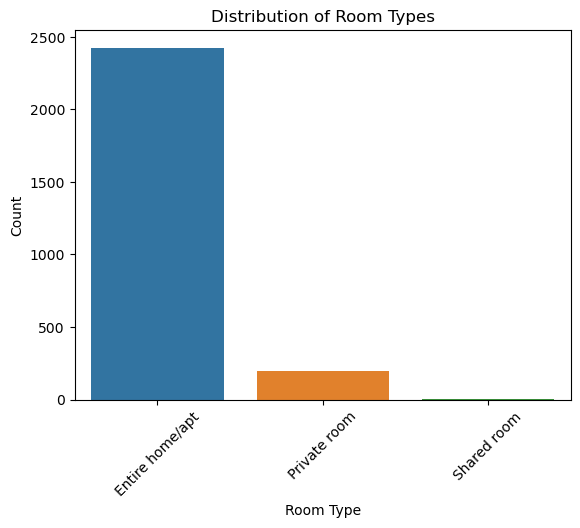

In [26]:
sns.countplot(data=df, x='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
# removing 'Private room' and 'Shared room' because of few observations
df = df[~df['room_type'].isin(['Private room', 'Shared room'])]
df=df.drop(columns=['room_type'])

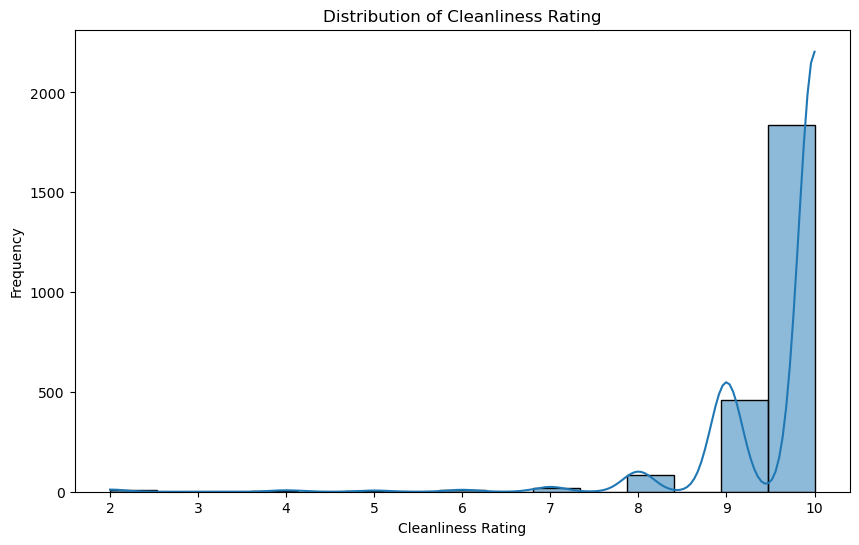

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cleanliness_rating'], kde=True, bins=15)
plt.title('Distribution of Cleanliness Rating')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.show()

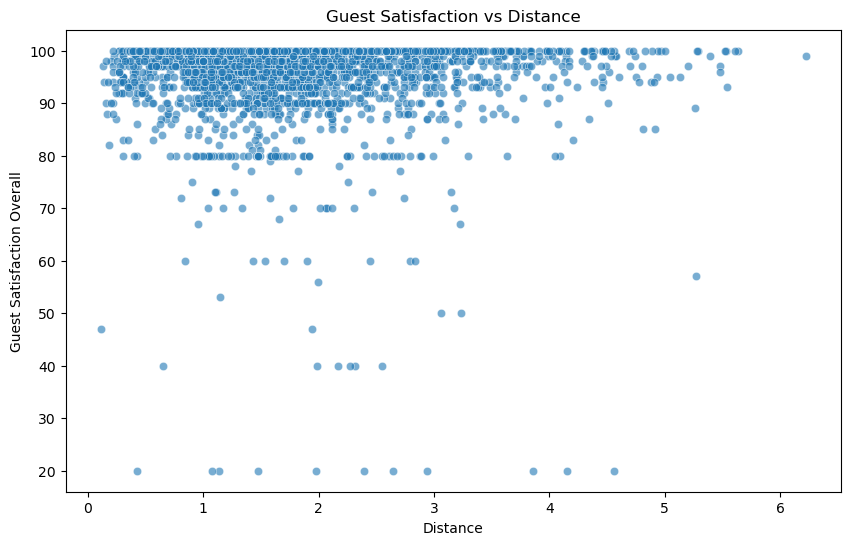

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dist', y='guest_satisfaction_overall', data=df, alpha=0.6)
plt.title('Guest Satisfaction vs Distance')
plt.xlabel('Distance')
plt.ylabel('Guest Satisfaction Overall')
plt.show()


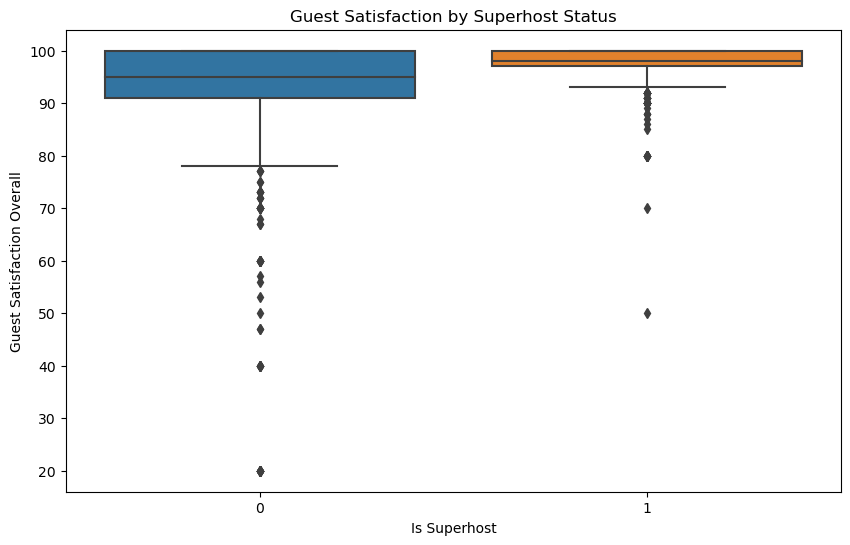

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='guest_satisfaction_overall', data=df)
plt.title('Guest Satisfaction by Superhost Status')
plt.xlabel('Is Superhost')
plt.ylabel('Guest Satisfaction Overall')
plt.show()


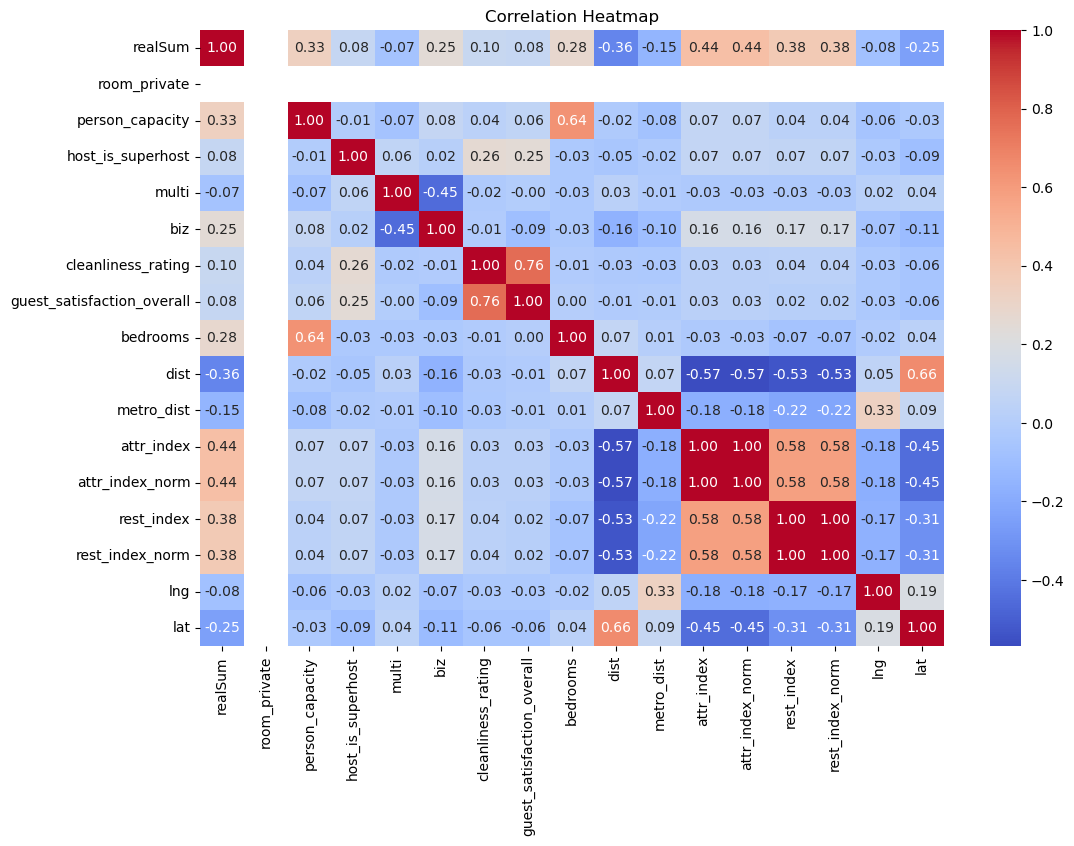

In [39]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


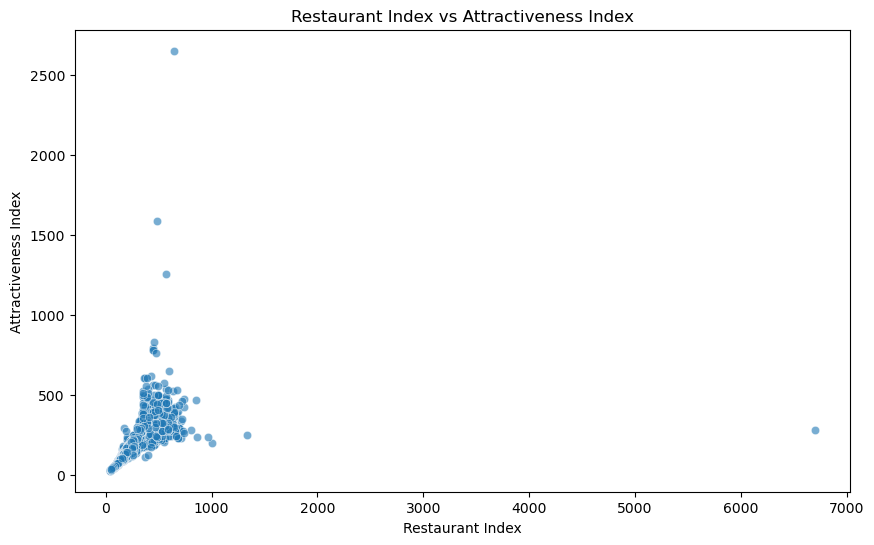

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rest_index', y='attr_index', data=df, alpha=0.6)
plt.title('Restaurant Index vs Attractiveness Index')
plt.xlabel('Restaurant Index')
plt.ylabel('Attractiveness Index')
plt.show()


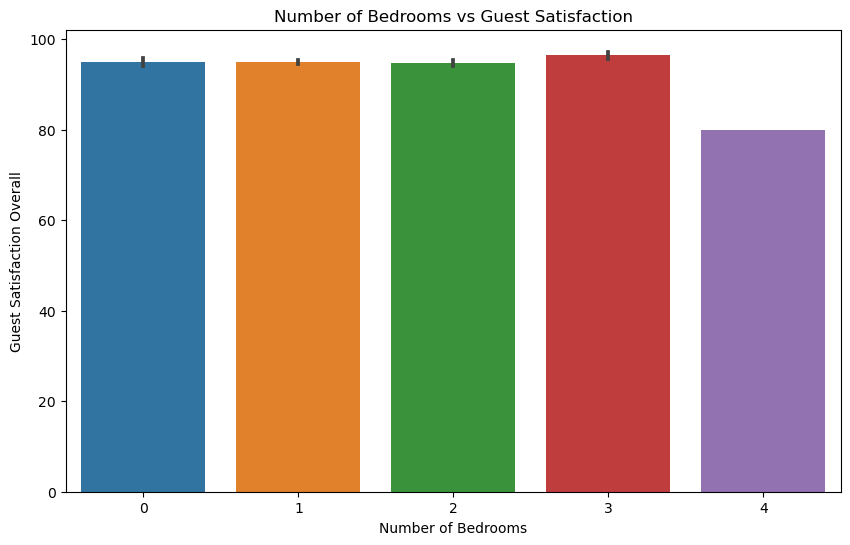

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='guest_satisfaction_overall', data=df)
plt.title('Number of Bedrooms vs Guest Satisfaction')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Guest Satisfaction Overall')
plt.show()


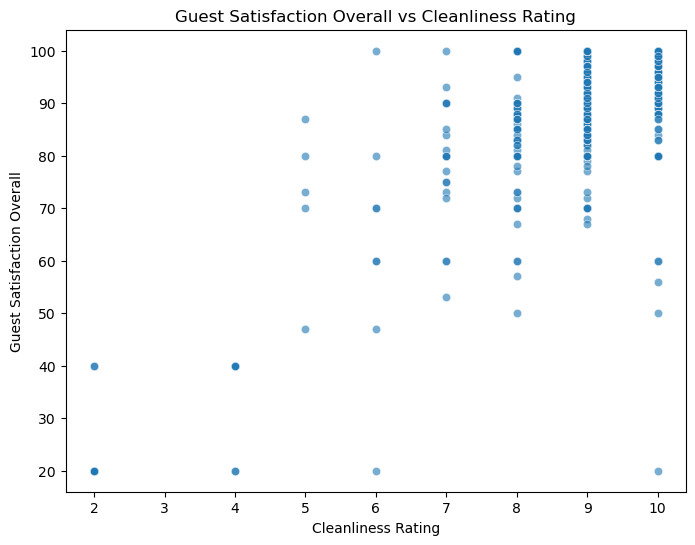

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=df, alpha=0.6)
plt.title('Guest Satisfaction Overall vs Cleanliness Rating')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Guest Satisfaction Overall')
plt.show()


# Hypothesis Testing

In [54]:
# Null Hypothesis: The mean price (realSum) is 100.
t_stat, p_value = ttest_1samp(df['realSum'], 100)
a=0.05
print("One-Sample T-Test:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(f"One-Sample T-Test: P-value = {p_value}")
print("Reject Null Hypothesis:", p_value < a)

One-Sample T-Test:
T-statistic: 32.22726865775255, P-value: 5.875998183174773e-190
One-Sample T-Test: P-value = 5.875998183174773e-190
Reject Null Hypothesis: True


In [55]:
# Null Hypothesis: The mean price for superhost and non-superhost listings is the same
superhost_prices = df[df['host_is_superhost'] == 1]['realSum']
non_superhost_prices = df[df['host_is_superhost'] == 0]['realSum']
a=0.05
t_stat, p_value = ttest_ind(superhost_prices, non_superhost_prices, equal_var=False)
print("\nTwo-Sample T-Test:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(f"Two-Sample T-Test: P-value = {p_value}")
print("Reject Null Hypothesis:", p_value < a)



Two-Sample T-Test:
T-statistic: 4.111812762451056, P-value: 4.066912576615054e-05
Two-Sample T-Test: P-value = 4.066912576615054e-05
Reject Null Hypothesis: True


In [56]:
# Null Hypothesis: The mean price is the same across all bedroom groups.
groups = [group['realSum'] for _, group in df.groupby('bedrooms')]
a=0.05
f_stat, p_value = f_oneway(*groups)
print("\nANOVA Test:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")
print(f"ANOVA Test: P-value = {p_value}")
print("Reject Null Hypothesis:", p_value < a)


ANOVA Test:
F-statistic: 83.15810288410341, P-value: 3.084674167781825e-66
ANOVA Test: P-value = 3.084674167781825e-66
Reject Null Hypothesis: True


In [62]:
# Null Hypothesis: The mean guest satisfaction is 95.

z_stat, p_value = smw.ztest(df['guest_satisfaction_overall'], value=95)
a=0.05
print("\nOne-Sample Z-Test:")
print(f"Z-statistic: {z_stat}, P-value: {p_value}")
print(f"One-Sample Z-Test: P-value = {p_value}")
print("Reject Null Hypothesis:", p_value < a)


One-Sample Z-Test:
Z-statistic: 0.29908399078713843, P-value: 0.7648759610420794
One-Sample Z-Test: P-value = 0.7648759610420794
Reject Null Hypothesis: False


In [63]:
# Null Hypothesis: The cleanliness rating is the same for business and non-business listings.

biz_cleanliness = df[df['biz'] == 1]['cleanliness_rating']
non_biz_cleanliness = df[df['biz'] == 0]['cleanliness_rating']
a=0.05
z_stat, p_value = smw.ztest(biz_cleanliness, non_biz_cleanliness)
print("\nTwo-Sample Z-Test:")
print(f"Z-statistic: {z_stat}, P-value: {p_value}")
print(f"Two-Sample Z-Test: P-value = {p_value}")
print("Reject Null Hypothesis:", p_value < a)


Two-Sample Z-Test:
Z-statistic: -0.5491267483111362, P-value: 0.582918469959736
Two-Sample Z-Test: P-value = 0.582918469959736
Reject Null Hypothesis: False


In [64]:
# Null Hypothesis: The mean price is the same across all distance quartiles.

df['dist_quartile'] = pd.qcut(df['dist'], q=4)
groups = [group['realSum'] for _, group in df.groupby('dist_quartile')]
a=0.05
f_stat, p_value = f_oneway(*groups)
print("\nANOVA Test (Distance Quartiles):")
print(f"F-statistic: {f_stat}, P-value: {p_value}")
print(f"ANOVA Test (Distance Quartiles): P-value = {p_value}")
print("Reject Null Hypothesis:", p_value < a)


ANOVA Test (Distance Quartiles):
F-statistic: 147.03668450298503, P-value: 1.5699066613300356e-87
ANOVA Test (Distance Quartiles): P-value = 1.5699066613300356e-87
Reject Null Hypothesis: True


In [66]:
# Null Hypothesis: The price distribution (realSum) follows a normal distribution.
stat, p_value = kstest(df['realSum'], 'norm', args=(df['realSum'].mean(), df['realSum'].std()))
a = 0.05
print("\nKolmogorov-Smirnov Test:")
print(f"Test Statistic: {stat}, P-value: {p_value}")
print("Reject Null Hypothesis (Data is not normal):", p_value < a)


Kolmogorov-Smirnov Test:
Test Statistic: 0.14373945794722565, P-value: 3.485134909308257e-44
Reject Null Hypothesis (Data is not normal): True


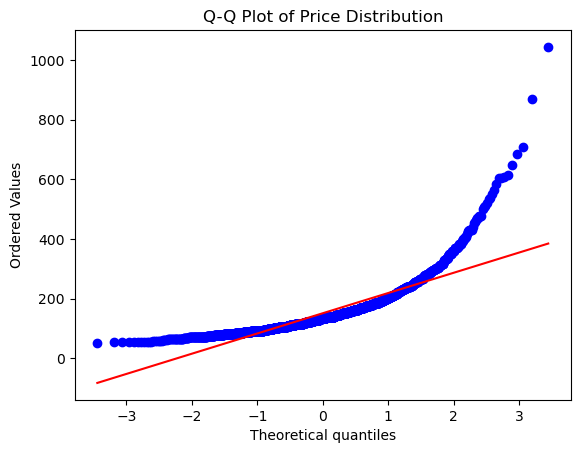

In [72]:

stats.probplot(df['realSum'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Price Distribution")
plt.show()


In [76]:
# Null Hypothesis: The data (realSum) follows an exponential distribution.
data = df['realSum']
lambda_est = 1 / np.mean(data)  
stat, p_value = kstest(data, 'expon', args=(0, 1/lambda_est))
a = 0.05
print("Kolmogorov-Smirnov Test for Exponential Distribution:")
print(f"Test Statistic: {stat}, P-value: {p_value}")
print("Reject Null Hypothesis (Data is not exponential):", p_value < a)

Kolmogorov-Smirnov Test for Exponential Distribution:
Test Statistic: 0.350126076742435, P-value: 2.9657007731738004e-266
Reject Null Hypothesis (Data is not exponential): True


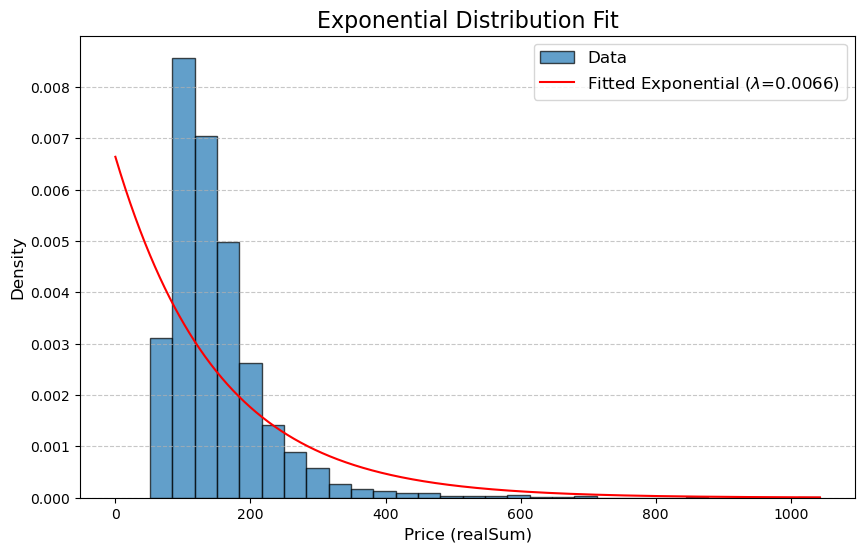

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, label='Data', edgecolor='k')
x = np.linspace(0, data.max(), 1000)
pdf = lambda_est * np.exp(-lambda_est * x)
plt.plot(x, pdf, 'r-', label=f'Fitted Exponential ($\lambda$={lambda_est:.4f})')

plt.title('Exponential Distribution Fit', fontsize=16)
plt.xlabel('Price (realSum)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Regression